#**Steel Industry Energy Consumption**
The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

Source : https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

#**Business Problem**
A random forest classifier has been developed to predict the target variable **Load Type**, which can take on the values Light Load, Medium Load, and Maximum Load. It is therefore a multiclassification model. A task force wants an explanation of how the classifier works (overall), and an explanation of how/why the prediction of the 10th instance, in particular, is produced by the classifier. Your explanation should be presented in everyday business language as the ML literacy of the task force is limited.   

#**Data Dictionary**
- Date - Time that information is stored on the Korea Electric Power Corporation website
- Usage_kWh - Industry Energy Consumption Continuous kWh
- Lagging Current reactive power Continuous kVarh  
- Leading Current reactive power Continuous kVarh  
- CO2(tCO2) - Carbon dioxide
- Lagging Current power factor Continuous %
- Leading Current Power factor Continuous %
- NSM - Number of Seconds from midnight  
- Week status Categorical - Weekend (0) and Weekday(1)
- Day of week Categorical - Monday to Sunday
- Load Type Categorical - Light Load, Medium Load, Maximum Load

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
!git clone --recursive https://github.com/dmlc/xgboost

'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import shap

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
import lime
import lime.lime_tabular

#**Read Data**

In [ ]:
# Read
file_ = "Steel_industry_data.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_, nrows=500) # read in csv file

#**EDA**

In [ ]:
# print first 5 rows of dataframe
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  500 non-null    object 
 1   Usage_kWh                             500 non-null    float64
 2   Lagging_Current_Reactive.Power_kVarh  500 non-null    float64
 3   Leading_Current_Reactive_Power_kVarh  500 non-null    float64
 4   CO2(tCO2)                             500 non-null    float64
 5   Lagging_Current_Power_Factor          500 non-null    float64
 6   Leading_Current_Power_Factor          500 non-null    float64
 7   NSM                                   500 non-null    int64  
 8   WeekStatus                            500 non-null    object 
 9   Day_of_week                           500 non-null    object 
 10  Load_Type                             500 non-null    object 
dtypes: 

In [ ]:
# Describe Dataset
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
         Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  500.000000                            500.000000   
mean    35.216060                             14.315440   
std     44.808769                             18.699962   
min      3.170000                              0.000000   
25%      4.140000                              3.530000   
50%      4.680000                              4.750000   
75%     65.132500                             21.660000   
max    147.460000                             78.480000   

       Leading_Current_Reactive_Power_kVarh   CO2(tCO2)  \
count                            500.000000  500.000000   
mean                               3.982680    0.011480   
std                                8.240695    0.019915   
min                                0.000000    0.000000   
25%                                0.000000    0.000000   
50%                                0.000000    0.000000   
75%                                0.477500

In [ ]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 Usage_kWh                               1.133940
Lagging_Current_Reactive.Power_kVarh    1.476547
Leading_Current_Reactive_Power_kVarh    1.811437
CO2(tCO2)                               1.483556
Lagging_Current_Power_Factor           -0.238482
Leading_Current_Power_Factor           -1.700052
NSM                                     0.060493
dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 Usage_kWh                              -0.199112
Lagging_Current_Reactive.Power_kVarh    0.992446
Leading_Current_Reactive_Power_kVarh    1.606698
CO2(tCO2)                               0.747900
Lagging_Current_Power_Factor           -1.638292
Leading_Current_Power_Factor            0.990531
NSM                                    -1.238966
dtype: float64


CORRELATION MATRIX
                                       Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.940597   
Leading_Current_Reactive_Power_kVarh  -0.299447   
CO2(tCO2)                              0.832234   
Lagging_Current_Power_Factor           0.450688   
Leading_Current_Power_Factor           0.317739   
NSM                                    0.253766   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.940597   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.357977   
CO2(tCO2)                                                         0.764240   
Lagging_Current_Power_Factor                                      0.259936   
Leading_Current_Power_Factor                                      0.359731   
NSM                      

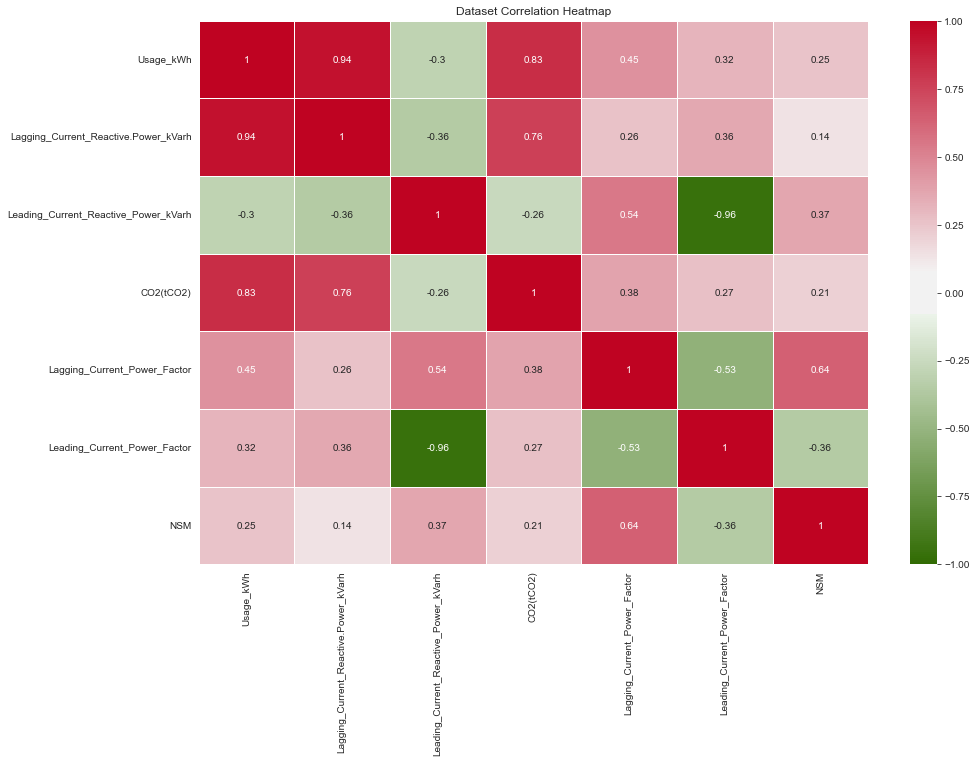



COVARIANCE MATRIX
                                           Usage_kWh  \
Usage_kWh                               2007.825752   
Lagging_Current_Reactive.Power_kVarh     788.147556   
Leading_Current_Reactive_Power_kVarh    -110.572417   
CO2(tCO2)                                  0.742654   
Lagging_Current_Power_Factor             285.679239   
Leading_Current_Power_Factor             414.579220   
NSM                                   288130.399719   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                       788.147556   
Lagging_Current_Reactive.Power_kVarh                            349.688584   
Leading_Current_Reactive_Power_kVarh                            -55.164555   
CO2(tCO2)                                                         0.284609   
Lagging_Current_Power_Factor                                     68.761841   
Leading_Current_Power_Factor                                    195.88

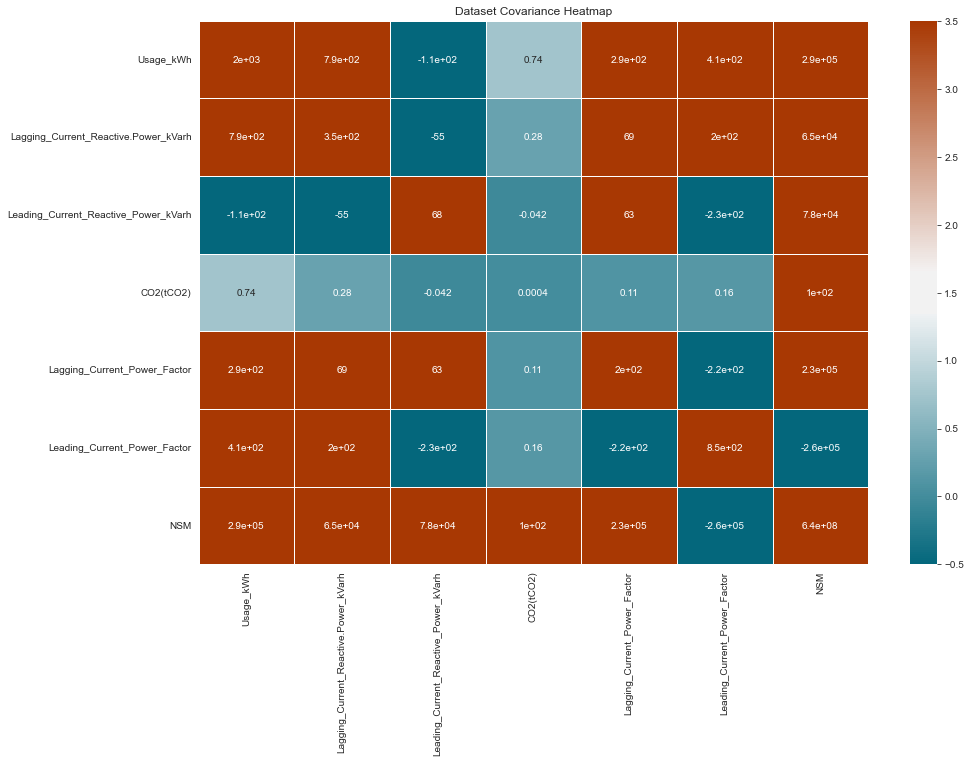

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [ ]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


#**Encoding**

In [ ]:
# Count categry
df['Load_Type'].value_counts()

Light_Load      276
Medium_Load     128
Maximum_Load     96
Name: Load_Type, dtype: int64

In [ ]:
# remove rows by filtering
df = df[df['Load_Type'] != 'Maximum_Load']
# display the dataframe
print(df)

                 date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0    01/01/2018 00:15       3.17                                  2.95   
1    01/01/2018 00:30       4.00                                  4.46   
2    01/01/2018 00:45       3.24                                  3.28   
3    01/01/2018 01:00       3.31                                  3.56   
4    01/01/2018 01:15       3.82                                  4.50   
..                ...        ...                                   ...   
495  06/01/2018 04:00       4.28                                  5.76   
496  06/01/2018 04:15       4.21                                  5.80   
497  06/01/2018 04:30       4.18                                  5.58   
498  06/01/2018 04:45       4.21                                  5.83   
499  06/01/2018 05:00       4.18                                  5.83   

     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                     0.0        0.0   

In [ ]:
# Check whether rows are deleted
df['Load_Type'].value_counts()

Light_Load     276
Medium_Load    128
Name: Load_Type, dtype: int64

In [ ]:
# Encode categorical target variable
Load_Type_mapping = {'Light_Load': 1,
                     'Medium_Load' : 0}
df['Load_Type'] = df['Load_Type'].map(Load_Type_mapping)

In [ ]:
# create dummy variables for categorical variable
df = pd.get_dummies(data=df, columns=['WeekStatus','Day_of_week'])

In [ ]:
# Drop date column
df =df.drop(['date'], axis=1)

In [ ]:
# print first 5 rows of dataframe
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0,0,1,0,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0,0,1,0,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0,0,1,0,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0,0,1,0,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0,0,1,0,0,0,0


# **Pre-processing -Skewness correction**

In [ ]:
# pick numerical variables and set them as X

X = df[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']]

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):

    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series


    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True

        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))

        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply log transformation
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply exp transformation
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew

        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()


    return DF


 ------------------------------------------------------

 'Usage_kWh' had 'positive' skewness of 1.54

 Transformation yielded skewness of 0.68


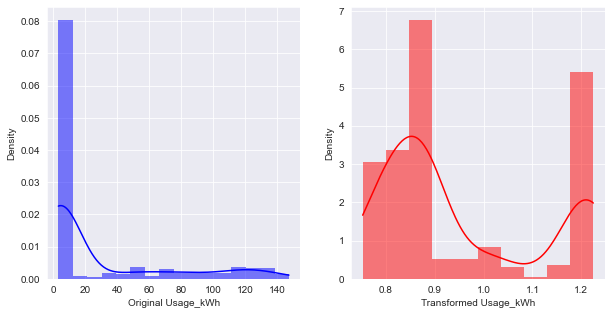


 ------------------------------------------------------

 'Lagging_Current_Reactive.Power_kVarh' had 'positive' skewness of 1.82

 Transformation yielded skewness of -0.20


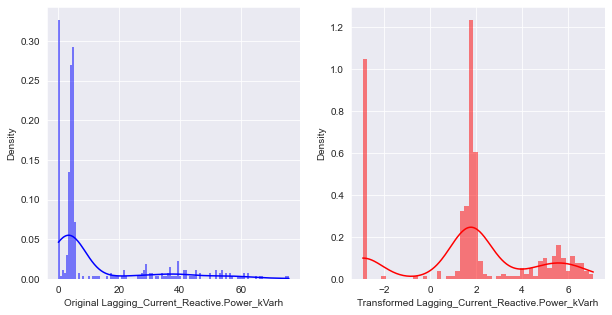


 ------------------------------------------------------

 'Leading_Current_Reactive_Power_kVarh' had 'positive' skewness of 1.54

 Transformation yielded skewness of 1.05


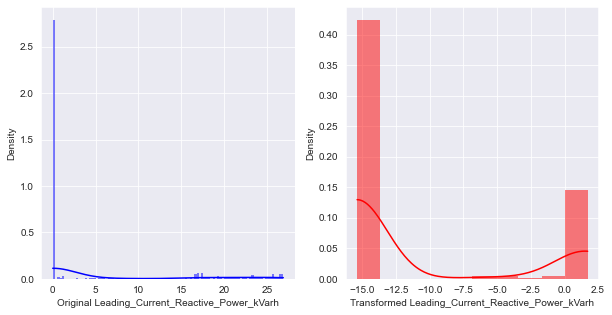


 ------------------------------------------------------

 'CO2(tCO2)' had 'positive' skewness of 1.90

 Transformation yielded skewness of 1.43


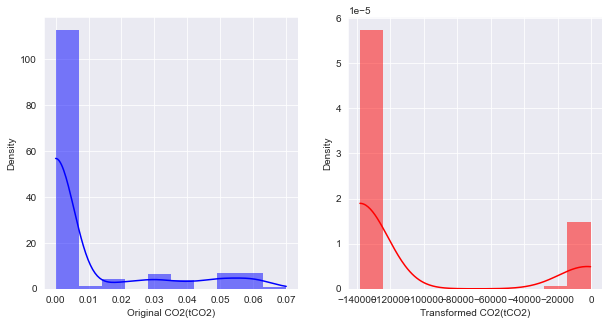


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Lagging_Current_Power_Factor' . Skewness = 0.00


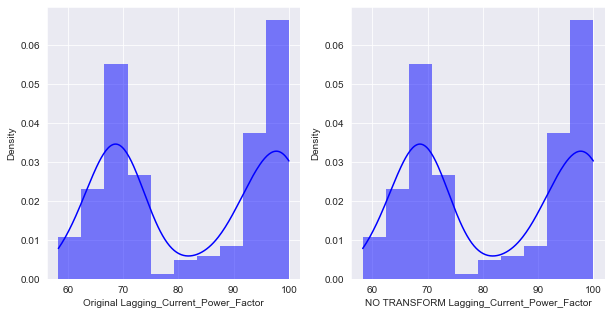


 ------------------------------------------------------

 'Leading_Current_Power_Factor' had 'negative' skewness of -1.44

 Transformation yielded skewness of -1.36


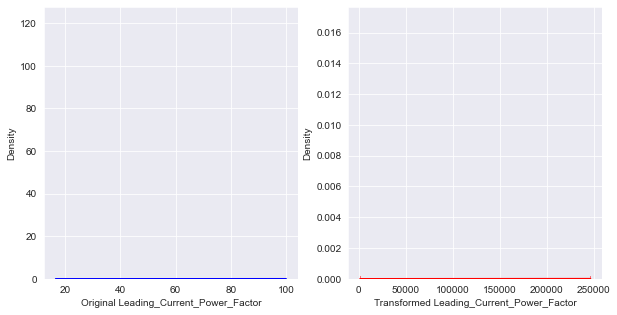


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'NSM' . Skewness = 0.33


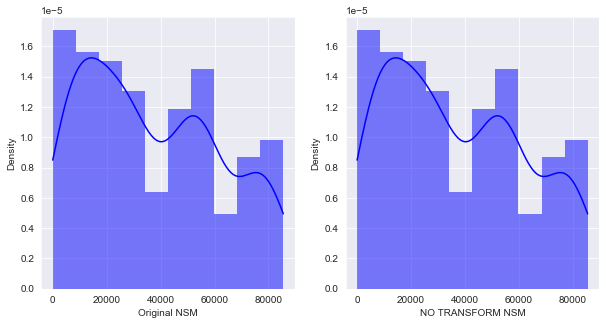

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Pre-processing-Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.
from scipy.stats.mstats import winsorize
cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)

# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  Usage_kWh :  []
Column  Lagging_Current_Reactive.Power_kVarh :  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 128, 129, 130, 131, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 231, 232, 233, 234, 235, 272, 273, 274, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 304, 305, 306, 307, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 375, 376, 377, 378, 379]
Column  Leading_Current_Reactive_Power_kVarh :  []
Column  CO2(tCO2) :  [0, 1, 2

In [ ]:
# Update result df with winzorized quant features

def windorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

lists = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']

windorized(lists)

In [ ]:
#Review columns
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type', 'WeekStatus_Weekday', 'WeekStatus_Weekend',
       'Day_of_week_Friday', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday'],
      dtype='object')

# **Model Building**

In [ ]:
# Split Predictors & Target
X = pd.DataFrame(df.drop(['Load_Type'],axis=1))
y = pd.DataFrame(df['Load_Type'])

In [ ]:
# Column names
cols = df.columns
Xcols = X.columns

# We will use the entire dataset for explainability (i.e., no split into training and test sets)
# SMOTE The data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

# Standardize the predictors
stdsc = StandardScaler()
X_SMOTE_std = pd.DataFrame(stdsc.fit_transform(X_SMOTE))

# Spawn instance of random forest classifier, parametrized according to the gridseracgh in the classification notebook
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(oob_score=True,class_weight= {0: 0.2, 1: 0.8}, criterion='gini',max_depth=7)

In [ ]:
X_SMOTE_std=pd.DataFrame(X_SMOTE_std)
X_SMOTE_std.columns = X.columns

In [ ]:
# Fit Random Forest model
RFC.fit(X_SMOTE_std,np.ravel(y_SMOTE))

# Capture predictons using Random Forest classifier
y_pred = RFC.predict(X_SMOTE_std)
y_pred = pd.DataFrame(y_pred)

#**M6 Hackathon Starts Here**
You have EDA, data preprocessing, and model. The ball is now in your court. Your objective is to interpret and explain the model performance using XAI methods. Good luck!

# **Feature Importance - Random Forest Feature Importance [Global Method]**

<AxesSubplot:>

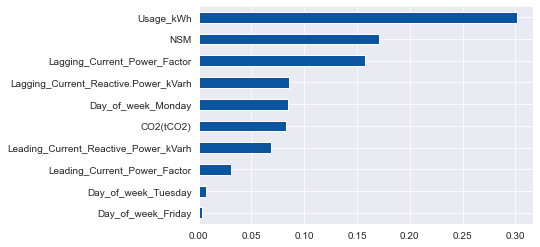

In [ ]:
# Fit Random Forest model, recover feature importances
RFC.fit(X_SMOTE_std,np.ravel(y_SMOTE))
feature_importances = pd.Series(RFC.feature_importances_, index=Xcols)
feature_importances.nlargest(10).sort_values().plot(kind='barh')

# **SHAP values [Global & Local Method]**

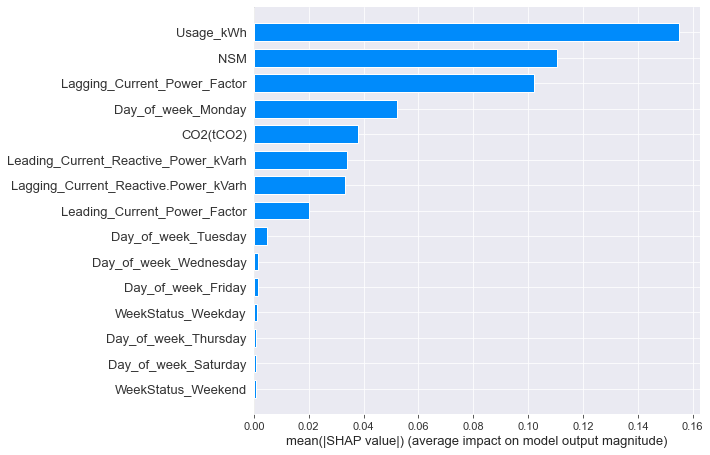

In [ ]:
explainer = shap.TreeExplainer(RFC)
shap_values = explainer.shap_values(X_SMOTE_std)
shap.summary_plot(shap_values[1], X_SMOTE_std, plot_type='bar',feature_names=Xcols)

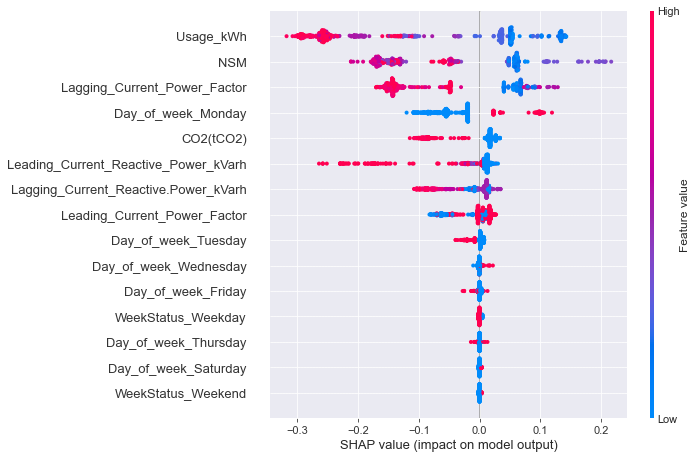

In [ ]:
shap.summary_plot(shap_values[1], X_SMOTE_std,feature_names=Xcols)

# **Partial Dependence Plots [Global Method]**

In [ ]:
Xcols

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday'],
      dtype='object')

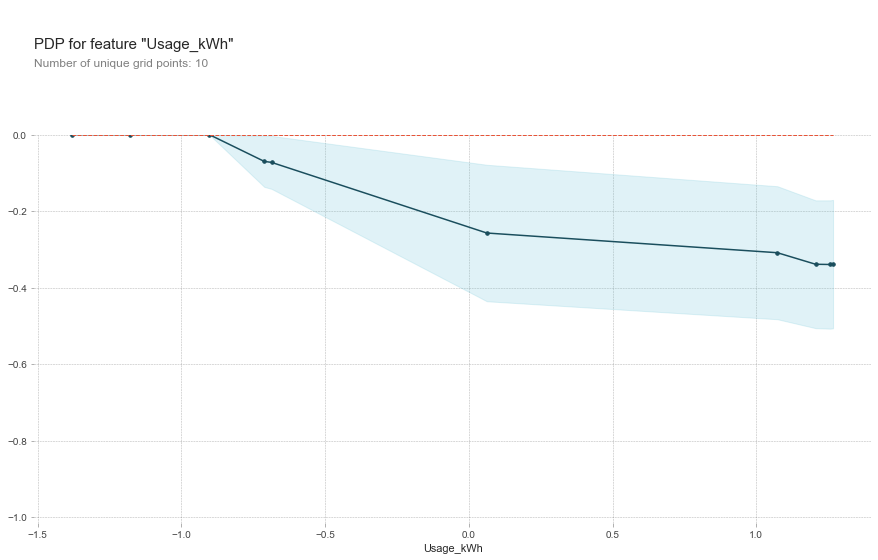

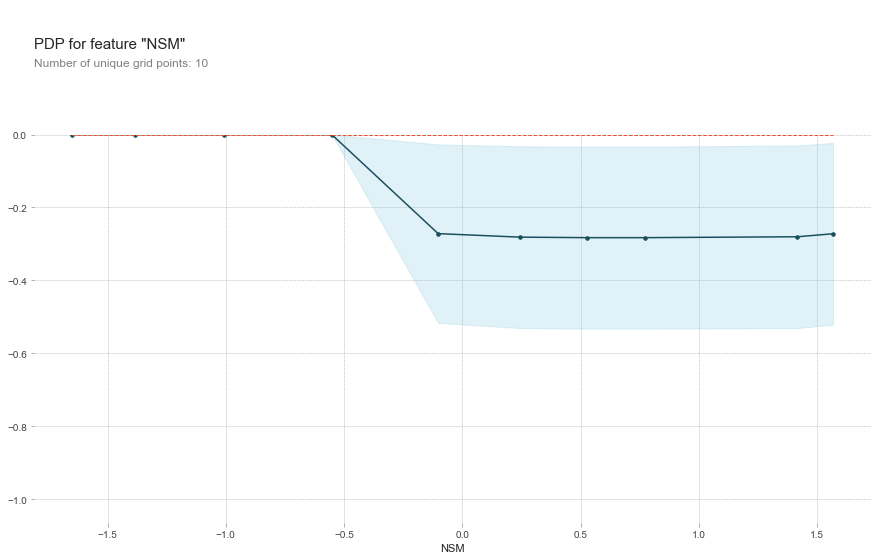

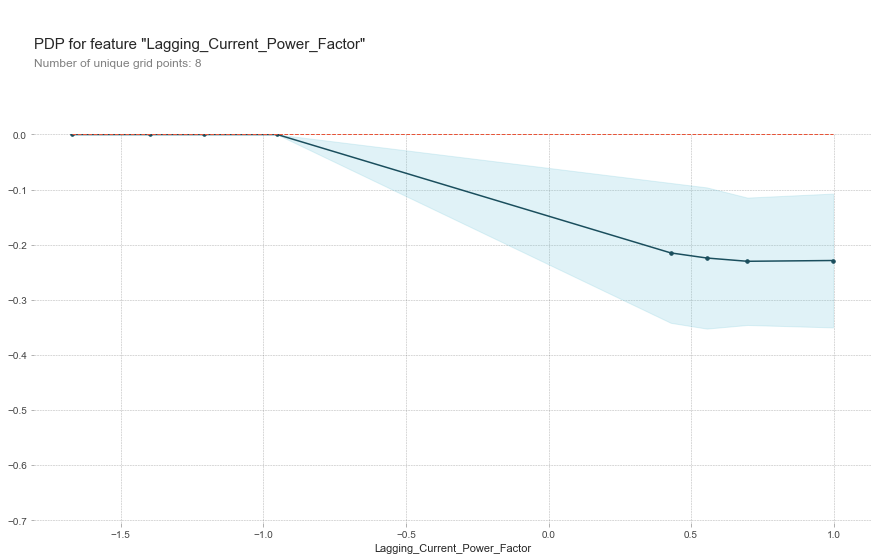

In [ ]:
X_SMOTE_std.columns = Xcols
for i in ['Usage_kWh', 'NSM', 'Lagging_Current_Power_Factor']:
    pdp_ = pdp.pdp_isolate(model = RFC, dataset = X_SMOTE_std, model_features=Xcols, feature = i)
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

In [ ]:
Usage_kWh_std = df['Usage_kWh'].std()
Usage_kWh_mean = df['Usage_kWh'].mean()
print('z = -1:', Usage_kWh_mean - Usage_kWh_std)
print('z = 0:', Usage_kWh_mean)

z = -1: 0.7895987923923751
z = 0: 0.9551837959663414


In [ ]:
NSM_std = df['NSM'].std()
NSM_mean = df['NSM'].mean()
print('z = -0.5:', NSM_mean - 0.5*NSM_std)
print('z = 0:', NSM_mean)

z = -0.5: 24440.86647607384
z = 0: 36746.28712871287


In [ ]:
Lagging_Current_Power_Factor_std = df['Lagging_Current_Power_Factor'].std()
Lagging_Current_Power_Factor_mean = df['Lagging_Current_Power_Factor'].mean()
print('z = -0.5:', Lagging_Current_Power_Factor_mean - 0.5*Lagging_Current_Power_Factor_std)
print('z = 0:', Lagging_Current_Power_Factor_mean)

z = -0.5: 75.2488019353837
z = 0: 82.44299504950492


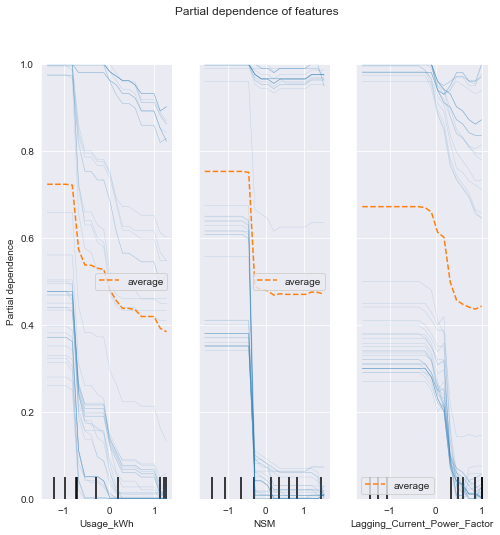

In [ ]:
# Creare PDP & ICE plots
features = ['Usage_kWh', 'NSM', 'Lagging_Current_Power_Factor']
fig, ax = plt.subplots(figsize=(8, 8))
display = PartialDependenceDisplay.from_estimator(
    RFC,
    X_SMOTE_std,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}, ax=ax
)
display.figure_.suptitle(
    "Partial dependence of features"
)
display.figure_.subplots_adjust(hspace=0.3)

# LIME

In [ ]:
# Preparation for LIME
predict_fn_rf = lambda x: RFC.predict_proba(x).astype(float)

# Create a LIME Explainer
X = X_SMOTE_std.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,
  feature_names = X_SMOTE_std.columns,
  class_names = ['medium load','light load'],
  kernel_width = 5)

# Choose the data point to be explained
chosen_index = X_SMOTE_std.index[10]
chosen_instance = X_SMOTE_std.loc[chosen_index].values
ci = pd.DataFrame([chosen_instance], columns = X_SMOTE_std.columns)
print('Chosen Instance to be explained:',ci,'has actual target value',y_SMOTE.loc[chosen_index], 'and predicted value ',y_pred.loc[chosen_index])

# Use the LIME explainer to explain the data point
exp = explainer.explain_instance(
  chosen_instance,
  predict_fn_rf,
  num_features = 10)
exp.show_in_notebook(show_all=False)

Chosen Instance to be explained:    Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  -1.262471                             -0.047044   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                              -0.70119  -0.645264   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor       NSM  \
0                      -1.51841                      0.585308 -1.347075   

   WeekStatus_Weekday  WeekStatus_Weekend  Day_of_week_Friday  \
0            0.193892           -0.193892            -0.39958   

   Day_of_week_Monday  Day_of_week_Saturday  Day_of_week_Thursday  \
0            2.179449             -0.193892             -0.402623   

   Day_of_week_Tuesday  Day_of_week_Wednesday  
0             -0.47036              -0.411693   has actual target value Load_Type    1
Name: 10, dtype: int64 and predicted value  0    1
Name: 10, dtype: int64


# **Surrogate Models [Global & Local Method]**

In [ ]:
# Decision Tree for Random Forest model
from sklearn import tree

proxy = DecisionTreeClassifier(random_state = 20850, max_depth=2)    # Control the depth of the proxy tree here
proxy.fit(X_SMOTE_std,y_pred)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
print(tree_graph)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Usage_kWh <= -0.669\ngini = 0.5\nsamples = 552\nvalue = [276, 276]"] ;
1 [label="Leading_Current_Reactive_Power_kVarh <= 1.513\ngini = 0.039\nsamples = 253\nvalue = [5, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 248\nvalue = [0, 248]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"] ;
1 -> 3 ;
4 [label="NSM <= -0.382\ngini = 0.17\nsamples = 299\nvalue = [271, 28]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.0\nsamples = 28\nvalue = [0, 28]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 271\nvalue = [271, 0]"] ;
4 -> 6 ;
}


In [ ]:
# How good is this surrogate decision tree model? Let's find out...
y_proxy = proxy.predict(X_SMOTE_std) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)
print('Correlation coefficient of RF predictions and Surrogate Model predictions: ',y_pred.corrwith(y_proxy,axis=0))

Correlation coefficient of RF predictions and Surrogate Model predictions:  0    1.0
dtype: float64


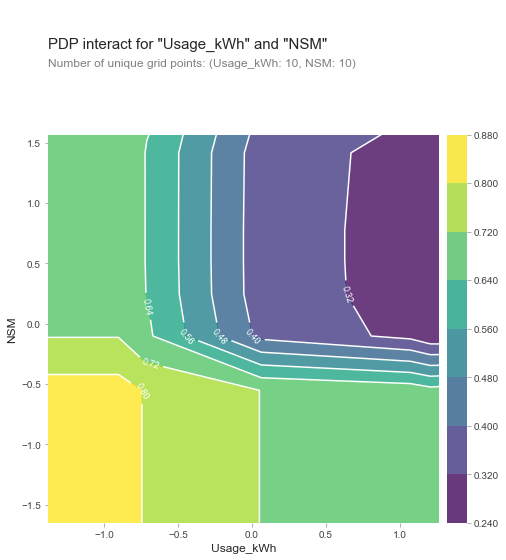

In [ ]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features = ['Usage_kWh', 'NSM', 'Lagging_Current_Power_Factor']
inter1  =  pdp.pdp_interact(model=RFC, dataset=X_SMOTE_std, model_features=X_SMOTE_std.columns, features=features)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features, plot_type='contour')
plt.show()

#**Conclusion**

We identified ['Usage_kWh', 'NSM', 'Lagging_Current_Power_Factor'] as the three most important features of the random forest model using both permutation feature importance and global Shapley value analysis.

With local Shapley values, we can notice the effects of variables. Specifically, high 'Usage_kWh', 'NSM', and 'Lagging_Current_Power_Factor' all lead to a higher load (i.e. higher possibility that the load is medium, instead of light)

With PDP, we can see how does the y change when different features changes.
- For Usage_kWh, when it is in the range of 0.79 to 0.96, there's higher chance that the load is high (or medium)
- For NSM, when it is in the range of 24440 to 36746, there's higher chance that the load is high (or medium)
- For Lagging_Current_Power_Factor, when it is in the range of 75 to 82, there's higher chance that the load is high (or medium)

LIME is used to locally explain the 10th instance. According to the random forest model, the 10th variable is a light load. . The low NSM, low Usage_kWh, low Lagging_Current_Power_Factor all contributed to this result. Also, the load is light since it's a monday.

The decision tree proxy model (for some levels of tree depth) uses features other than the most important ones identified using Shapley or permutation feature importance analysis (Leading_Current_Reactive_Power_kVarh). This is something of an anomaly that needs to be explored.

The ICE plots show good separation of the instances by feature value.

Overall, results are very promising. We have a powerful classifiers, and if the explanations hold up on a larger dataset, their automated use in annotating mammograms and other clinical applications can be explored.